In [1]:
import json
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes
from matplotlib.container import BarContainer
import numpy as np
from pathlib import Path


class FakeFitness:
    values = None

In [2]:
#
# Explore neighborhood of solutions of the original DeepJanus-MNIST experiments
#
from deepjanus_mnist.mnist_individual import MNISTIndividual
from deepjanus_mnist.mnist_member import MNISTMember
from deepjanus_mnist.mnist_problem import MNISTProblem
from deepjanus_mnist.mnist_config import MNISTConfig
from deepjanus_mnist.image_tools import bitmap_to_svg


config = MNISTConfig('../DeepJanus-MNIST')
problem = MNISTProblem(config)

beamng_experiments_path = Path('./DeepJanus/MNIST')
results = {}
for i in range(1, 11):
    results[i] = []
    archive_path = beamng_experiments_path.joinpath(str(i), 'results', 'archive')
    member_files = list(archive_path.glob('*.npy'))
    num_files = len(member_files)
    print(f'### Evaluating results of experiment {i}')
    for j in range(0, num_files, 2):
        member1_index =  str(member_files[j]).split('_')[1]
        member2_index = str(member_files[j+1]).split('_')[1]
        assert member1_index == member2_index

        member1_bitmap = (np.load(member_files[j]) * 255).reshape((28,28))
        member2_bitmap = (np.load(member_files[j+1]) * 255).reshape((28,28))

        member1 = MNISTMember(bitmap_to_svg(member1_bitmap), 5)
        member2 = MNISTMember(bitmap_to_svg(member2_bitmap), 5)

        individual1 = MNISTIndividual(member1)
        individual2 = MNISTIndividual(member2)

        individual1.fitness = FakeFitness()
        individual2.fitness = FakeFitness()

        individual1.evaluate(problem)
        individual2.evaluate(problem)

        results[i].append((individual1.unsafe_region_probability, individual2.unsafe_region_probability))

        print(f'Individual {int(j/2+1)}/{int(num_files/2)} evaluated')

with open('./probabilistic_eval_mnist.json', 'w') as f:
    f.write(json.dumps(results))

Seed folder "digit5" is empty
2024-03-21 16:16:46.790233: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


### Evaluating results of experiment 1


2024-03-21 16:16:46.814421: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-21 16:16:46.814459: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-21 16:16:46.815126: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-21 16:16:46.818959: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-21 16:16:46.819410: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructio

Individual 1/83 evaluated
Individual 2/83 evaluated
Individual 3/83 evaluated
Individual 4/83 evaluated
Individual 5/83 evaluated
Individual 6/83 evaluated
Individual 7/83 evaluated
Individual 8/83 evaluated
Individual 9/83 evaluated
Individual 10/83 evaluated
Individual 11/83 evaluated
Individual 12/83 evaluated
Individual 13/83 evaluated
Individual 14/83 evaluated
Individual 15/83 evaluated
Individual 16/83 evaluated
Individual 17/83 evaluated
Individual 18/83 evaluated
Individual 19/83 evaluated
Individual 20/83 evaluated
Individual 21/83 evaluated
Individual 22/83 evaluated
Individual 23/83 evaluated
Individual 24/83 evaluated
Individual 25/83 evaluated
Individual 26/83 evaluated
Individual 27/83 evaluated
Individual 28/83 evaluated
Individual 29/83 evaluated
Individual 30/83 evaluated
Individual 31/83 evaluated
Individual 32/83 evaluated
Individual 33/83 evaluated
Individual 34/83 evaluated
Individual 35/83 evaluated
Individual 36/83 evaluated
Individual 37/83 evaluated
Individual

In [ ]:
#
# Explore neighborhood of solutions of the original DeepJanus-BNG experiments
#
from deepjanus_bng.beamng_individual import BeamNGIndividual
from deepjanus_bng.beamng_member import BeamNGMember
from deepjanus_bng.beamng_problem import BeamNGProblem
from deepjanus_bng.beamng_config import BeamNGConfig
from deepjanus_bng.shapely_roads import RoadGenerationBoundary


def member_from_dict(d: dict):
    c = [tuple(point) for point in d['control_nodes']]
    s = [tuple(point) for point in d['sample_nodes']]
    n = d['num_spline_nodes']
    b = RoadGenerationBoundary(tuple(d['road_bbox_size']))
    return BeamNGMember(c, s, n, b)

config = BeamNGConfig('../DeepJanus-BNG')
problem = BeamNGProblem(config)

beamng_experiments_path = Path('./DeepJanus/BNG')
results = {}
for i in range(1, 11):
    results[i] = []
    archive_path = beamng_experiments_path.joinpath(str(i), 'archive')
    ind_files = archive_path.glob('*.json')
    print(f'### Evaluating results of experiment {i}')
    for j in range(len(ind_files)):
        with open(ind_files[j]) as f:
            dj_ind = json.load(f)
        
        member1 = member_from_dict(dj_ind['m1'])
        member2 = member_from_dict(dj_ind['m2'])

        individual1 = BeamNGIndividual(member1)
        individual2 = BeamNGIndividual(member2)

        individual1.fitness = FakeFitness()
        individual2.fitness = FakeFitness()

        individual1.evaluate(problem)
        individual2.evaluate(problem)

        results[i].append((individual1.unsafe_region_probability, individual2.unsafe_region_probability))

        print(f'Individual {j+1}/{len(ind_files)} evaluated')

with open('probabilistic_eval_beamng.json', 'w') as f:
    f.write(json.dumps(results))

In [3]:
# Data structure:
# dictionary with experiment names as keys ("1", "2", ...) and lists of probabilistic evaluations of all individuals as items.
# A probabilistic evaluation for one individual is composed of two confidence intervals estimating the unsafe region of both members

# NOTE: change name of file here to get graphs for other experiments <===========================
with open('probabilistic_eval_mnist.json') as f:
    data: dict = json.loads(f.read())

In [4]:
def interval_intersect(a,b):
    a0,a1 = a
    b0,b1 = b
    return max(0,min(a1,b1)-max(a0,b0))


results = {}
experiments = []
same_regions = []
different_regions = []
totals = []
different_region_distances = []
for experiment, individuals_eval in data.items():
    same_region = 0
    different_region = 0
    for region_ci_member1, region_ci_member2 in individuals_eval:
        intersect = interval_intersect(region_ci_member1, region_ci_member2)
        
        lb1, ub1 = region_ci_member1
        lb2, ub2 = region_ci_member2
        region_estimator_member1 = lb1 + (ub1 - lb1) / 2.
        region_estimator_member2 = lb2 + (ub2 - lb2) / 2.

        dist = abs(region_estimator_member2 - region_estimator_member1)
        
        if intersect > 0:
            same_region += 1
        else:
            different_region += 1
            different_region_distances.append(dist)
    
    # Data for matplotlib
    experiments.append(experiment)
    same_regions.append(same_region)
    different_regions.append(different_region)
    totals.append(same_region + different_region)

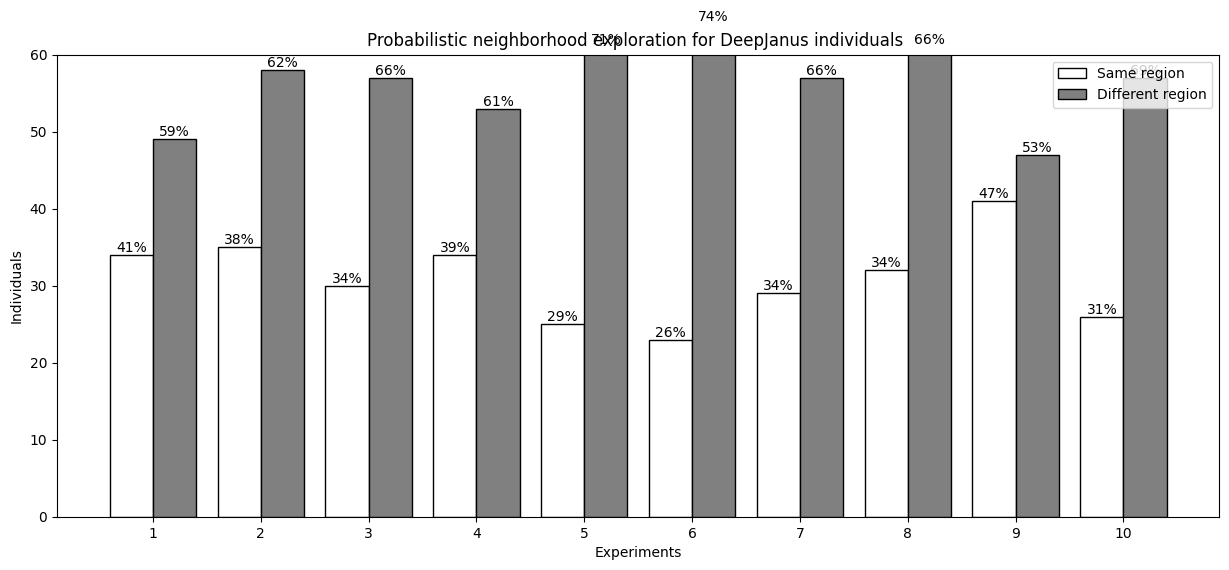

In [5]:
def plot_bars(ax: Axes, indexes: list[float], eval_result, label, width=0.4, color='white', hatch=None):
    bar_vcenter = lambda b : b.get_x() + b.get_width() / 2.0
    bar_htop = lambda b : b.get_y() + b.get_height()
    bar_hbottom = lambda b : b.get_y()
    
    # Bottom bar
    bar_container: BarContainer = ax.bar(indexes, eval_result[0], width, label=label, edgecolor='black', color=color, hatch=hatch)
    
    # # Member name inside bottom bar
    # for bar in bar_container:
    #     ax.text(bar_vcenter(bar), bar_hbottom(bar), mbr, ha='center', va='bottom')
    # 
    # # Top bar
    # bar_container: BarContainer = ax.bar(indexes, eval_result['in'], width, label='Inside frontier', bottom=eval_result['out'], edgecolor='black', color='white')
    
    # Percentage number over the bars
    perc_str = list(map(lambda p : f'{round(p * 100)}%', eval_result[1]))
    for i in range(len(bar_container)):
        bar = bar_container[i]
        ax.text(bar_vcenter(bar), bar_htop(bar), perc_str[i], ha='center', va='bottom')


fig: Figure
ax: Axes
fig, ax = plt.subplots(figsize=(15,6))

indices = np.arange(len(experiments))
bar_width = 0.4
# Plot bars representing the results
plot_bars(ax, indices, (same_regions, np.divide(same_regions, totals)), "Same region", bar_width)
plot_bars(ax, indices + bar_width, (different_regions, np.divide(different_regions, totals)), "Different region", bar_width, color='grey')

# Set axis properties
ax.xaxis.set_ticks(indices + bar_width / 2, experiments)
ax.set_ylim(0, 60)
ax.set_title('Probabilistic neighborhood exploration for DeepJanus individuals ')
ax.set_xlabel('Experiments')
ax.set_ylabel('Individuals')

# Remove duplicated entries from legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
_ = ax.legend(by_label.values(), by_label.keys(), loc="upper right")

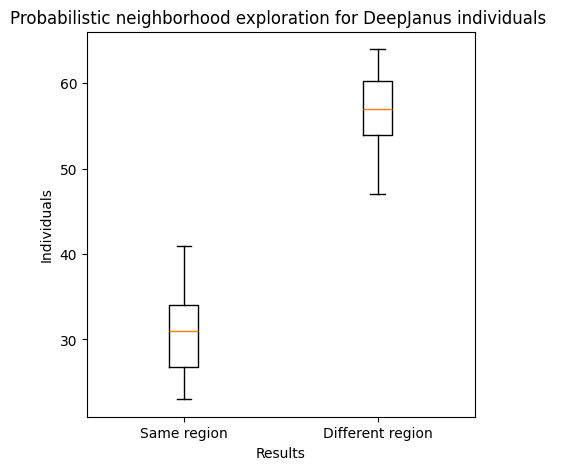

In [6]:
fig, ax = plt.subplots(figsize=(5,5))

# Boxplot summarizing the results
ax.boxplot((same_regions, different_regions), labels=('Same region', 'Different region'))

# Set axis properties
ax.set_title('Probabilistic neighborhood exploration for DeepJanus individuals ')
ax.set_xlabel('Results')
_ = ax.set_ylabel('Individuals')

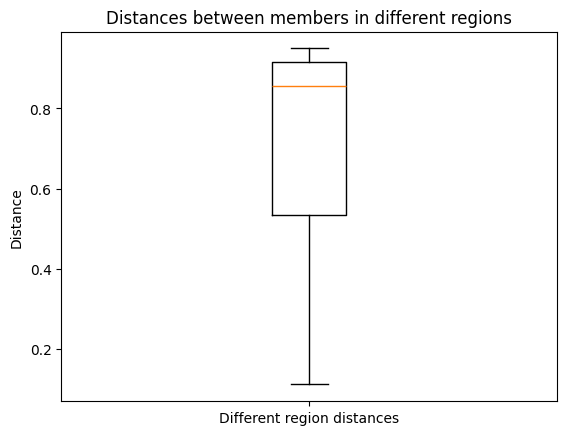

In [7]:
fig, ax = plt.subplots()

# Boxplot summarizing the results
ax.boxplot(different_region_distances, labels=('Different region distances',))

# Set axis properties
ax.set_title('Distances between members in different regions')
_ = ax.set_ylabel('Distance')